# Compare normalization of tokens via stemming and lemmatization

In [44]:
# TODO plots of type-token ration and character-token ratio by author and stemming type (similar to Apples to Apple paper)
# TODO measure vocab overlap after pruning
# TODO pull metrics out of diagnostics xml in some informative way 
# TODO Visualize author correlations for each stemmed model in a way that they can be compared
# TODO "Influential Words" and stemming conflation (sec 5.5 in Apples to Apple)
from pathlib import Path

import pandas as pd
import seaborn as sns

from topic_modeling.analysis import *
import topic_modeling.preprocessing as preprocessing


all_stemmers = ['pymystem3', 'snowball', 'stanza', 'truncate']

In [45]:
# Load in original author counts
UNSTEMMED_CORPUS_DIR = Path('/home/virginia/workspace/topic-modeling-study/russian_novels') 
ORIGINAL_CORPUS = UNSTEMMED_CORPUS_DIR / 'russian_novels.tsv'
ORIGINAL_PRUNED_VOCAB = UNSTEMMED_CORPUS_DIR  / 'russian_novels_pruned_vocab.txt'

In [46]:
original_token_counts_by_author = corpus_to_author_token_counts(ORIGINAL_CORPUS)
print(len(original_token_counts_by_author))
original_token_counts_by_author.head()

849536


,author,token,count
0,SKhvoshchinskaya,i,1
1,SKhvoshchinskaya,лѣто,10
2,SKhvoshchinskaya,прошлаго,4
3,SKhvoshchinskaya,года,4
4,SKhvoshchinskaya,настасья,305


In [47]:
# 'go list' or actual vocab
pruned_vocab = get_token_list(ORIGINAL_PRUNED_VOCAB)
original_token_counts_by_author_pruned = original_token_counts_by_author[original_token_counts_by_author['token'].isin(pruned_vocab)]
original_token_counts_by_author_pruned['token_length'] = original_token_counts_by_author_pruned['token'].str.len()
print(len(original_token_counts_by_author_pruned))
original_token_counts_by_author_pruned.head()

528760
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,author,token,count,token_length
0,SKhvoshchinskaya,i,1,1
1,SKhvoshchinskaya,лѣто,10,4
2,SKhvoshchinskaya,прошлаго,4,8
3,SKhvoshchinskaya,года,4,4
4,SKhvoshchinskaya,настасья,305,8


In [48]:
# TODO compute average token length by author in groupby
original_token_counts_by_author_pruned['length_sum'] = original_token_counts_by_author_pruned['count'] * original_token_counts_by_author_pruned['token_length']
original_token_counts_by_author_pruned['type_token_ratio'] = original_token_counts_by_author_pruned['count'].apply(lambda x: 1/x)
original_token_counts_by_author_pruned.head()

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,author,token,count,token_length,length_sum,type_token_ratio
0,SKhvoshchinskaya,i,1,1,1,1.000000
1,SKhvoshchinskaya,лѣто,10,4,40,0.100000
2,SKhvoshchinskaya,прошлаго,4,8,32,0.250000
3,SKhvoshchinskaya,года,4,4,16,0.250000
4,SKhvoshchinskaya,настасья,305,8,2440,0.003279


In [50]:
 original_token_counts_by_author_pruned.groupby(['author']).size().reset_index()

author
Bulgakov             31850
Chekhov              11925
Dostoyevsky          44317
Durova               23392
Gan                   9257
Gippius              16120
Gogol                22887
Gorky                46731
Krjukov              15517
NKhvoshchinskaya     17637
Nabokov              56029
Panaeva              15410
Pushkin              15305
SKhvoshchinskaya      6238
Sholokhov            44471
Sologub              31681
Tolstoi              38881
Tur                  12410
Turgenev             32278
Volkonskaya           4028
Vovchok              22150
Zhukova               8189
Zinovieva-Annibal     2057
dtype: int64

In [57]:
author_groupby = original_token_counts_by_author_pruned.groupby(['author']).agg(
    vocab_size=('author','size'),
    total_tokens=('count', 'sum'),
    total_token_length=('length_sum', 'sum'),

).reset_index()

author_groupby['char_token_ratio'] = author_groupby['total_token_length'] / author_groupby['total_tokens']
author_groupby['type_token_ratio'] = author_groupby['vocab_size'] / author_groupby['total_tokens']
display(author_groupby['char_token_ratio'].describe())
display(author_groupby['type_token_ratio'].describe())

author_groupby.head(23)

,author,vocab_size,total_tokens,total_token_length,type_token_ratio1,char_token_ratio,type_token_ratio2
0,Bulgakov,31850,161762,1093677,0.586056,6.761025,0.196894
1,Chekhov,11925,34913,228981,0.712804,6.558617,0.341563
2,Dostoyevsky,44317,463277,3110626,0.478864,6.714398,0.095660
3,Durova,23392,128139,834890,0.594018,6.515503,0.182552
4,Gan,9257,20685,140000,0.769646,6.768190,0.447522
5,Gippius,16120,59676,391049,0.682964,6.552869,0.270125
6,Gogol,22887,89847,594369,0.657301,6.615346,0.254733
7,Gorky,46731,448559,2977486,0.471805,6.637892,0.104180
8,Krjukov,15517,41722,282694,0.719429,6.775658,0.371914
9,NKhvoshchinskaya,17637,65277,434776,0.674920,6.660478,0.270187


<AxesSubplot:xlabel='char_token_ratio', ylabel='author'>

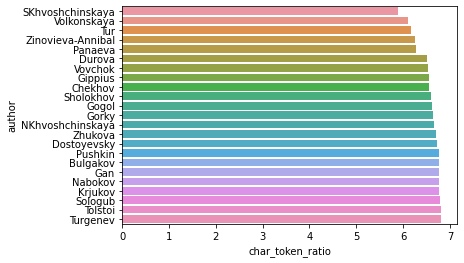

In [53]:
# This is the character-token ratio (as in Apples to Apple)
sns.barplot(data=author_groupby, y='author', x='char_token_ratio', order=author_groupby.sort_values('char_token_ratio').author)

<AxesSubplot:xlabel='avg_type_token_ratio', ylabel='author'>

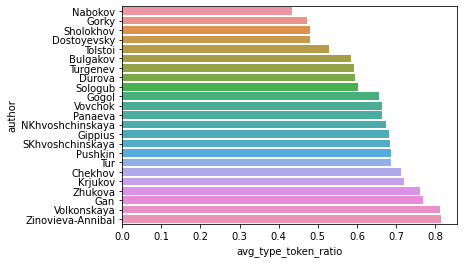

In [39]:
# This is the type-token ratio (as in Apples to Apple)
sns.barplot(data=author_groupby, y='author', x='avg_type_token_ratio', order=author_groupby.sort_values('type_token_ratio').author)

In [15]:
# Just start by comparing pymystem to original 
stemmer = 'pymystem3'
stemmed_dir_path = Path(f'/home/virginia/workspace/topic-modeling-study/russian_novels_{stemmer}')
stemmed_lemma_counts_path = stemmed_dir_path / f'russian_novels_{stemmer}_lemma_counts.tsv'
# This gets the counds of all lemma/token pairs
stemmed_token_counts_by_author = pd.read_csv(stemmed_lemma_counts_path, sep='\t', header=0, encoding='utf-8')
print(len(stemmed_token_counts_by_author))
stemmed_token_counts_by_author.head()

839731


,author,token,normalized,count
0,Turgenev,было,быть,919
1,Turgenev,тихое,тихий,9
2,Turgenev,летнее,летний,3
3,Turgenev,утро,утро,58
4,Turgenev,солнце,солнце,42


In [29]:
stemmed_pruned_vocab = stemmed_dir_path / f'russian_novels_{stemmer}_pruned_vocab.txt'
kept_lemmas = get_token_list(stemmed_pruned_vocab)
stemmed_token_counts_by_author_pruned = stemmed_token_counts_by_author[stemmed_token_counts_by_author['normalized'].isin(kept_lemmas)]
stemmed_token_counts_by_author_pruned['stem_length'] = stemmed_token_counts_by_author_pruned['normalized'].str.len()
stemmed_token_counts_by_author_pruned['length_sum'] = stemmed_token_counts_by_author_pruned['stem_length'] * stemmed_token_counts_by_author_pruned['count']
print(len(stemmed_token_counts_by_author_pruned))
stemmed_token_counts_by_author_pruned.head()



741521
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,author,token,normalized,count,stem_length,length_sum
1,Turgenev,тихое,тихий,9,5,45
2,Turgenev,летнее,летний,3,6,18
3,Turgenev,утро,утро,58,4,232
4,Turgenev,солнце,солнце,42,6,252
6,Turgenev,довольно,довольно,185,8,1480


In [38]:
# What's overlap between pruned vocabularies? Does it look sane?
vocab_overlap = pruned_vocab & kept_lemmas
print(len(vocab_overlap))
list(vocab_overlap)[:20]


16014


['по-летнему',
 'болеть',
 'озорно',
 'деревушка',
 'матовый',
 'денисов',
 'указанный',
 'трепать',
 'душенька',
 'небесный',
 'ханжество',
 'ожог',
 'выносить',
 'инстинктивно',
 'вкруг',
 'откровение',
 'вертикально',
 'слесарь',
 'здоровый',
 'федосья']

In [30]:
author_stem_groupby = stemmed_token_counts_by_author_pruned.groupby(['author']).agg({'count': ['sum'], 'length_sum':['sum']}).reset_index()
author_stem_groupby.columns = ['author', 'total_tokens', 'total_tokens_length']
author_stem_groupby['char_token_ratio'] = author_groupby['total_tokens_length'] / author_stem_groupby['total_tokens']
display(author_stem_groupby['char_token_ratio'].describe())
author_stem_groupby.head()

count    23.000000
mean      7.495543
std       0.440644
min       6.297392
25%       7.303601
50%       7.581521
75%       7.778125
max       8.109852
Name: char_token_ratio, dtype: float64

,author,total_tokens,total_tokens_length,char_token_ratio
0,Bulgakov,150777,1091967,7.253606
1,Chekhov,29035,206686,7.886379
2,Dostoyevsky,391233,2890237,7.950827
3,Durova,107953,770200,7.733829
4,Gan,18391,135581,7.612419


<AxesSubplot:xlabel='char_token_ratio', ylabel='author'>

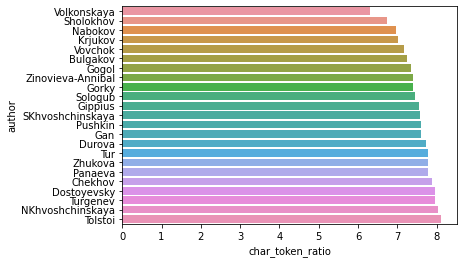

In [31]:
sns.barplot(data=author_stem_groupby, y='author', x='char_token_ratio', order=author_stem_groupby.sort_values('char_token_ratio').author)

In [ ]:
# TODO join with original char_token_ratio dfs and plot by author as hue to compare changes